<a href="https://www.kaggle.com/code/omeraydogddu/association-analysis?scriptVersionId=169318401" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

takımlar = [
       {'No':'1', 'Takım':'Galatasaray,Beşiktaş'}, 
       {'No':'2', 'Takım':'RealMadrid,Barcelona'}, 
       {'No':'3', 'Takım':'Juventus,Galatasaray'}, 
       {'No':'4', 'Takım':'Fenerbahçe,Barcelona'}, 
       {'No':'5', 'Takım':'Inter,Galatasaray'},
       {'No':'6', 'Takım':'BayernMunih,Schalke'},
       {'No':'7', 'Takım':'Psg,RealMadrid'},
       {'No':'8', 'Takım':'Villareal,Sevilla'},
      ]
df = pd.DataFrame(takımlar)
df

,No,Takım
0,1,"Galatasaray,Beşiktaş"
1,2,"RealMadrid,Barcelona"
2,3,"Juventus,Galatasaray"
3,4,"Fenerbahçe,Barcelona"
4,5,"Inter,Galatasaray"
5,6,"BayernMunih,Schalke"
6,7,"Psg,RealMadrid"
7,8,"Villareal,Sevilla"


In [4]:
str_exp = df.assign(Takım=df.Takım.str.split(",")).explode("Takım")
str_exp

,No,Takım
0,1,Galatasaray
0,1,Beşiktaş
1,2,RealMadrid
1,2,Barcelona
2,3,Juventus
2,3,Galatasaray
3,4,Fenerbahçe
3,4,Barcelona
4,5,Inter
4,5,Galatasaray


In [5]:
df2 = pd.crosstab(str_exp.No, str_exp.Takım)
df2

Takım,Barcelona,BayernMunih,Beşiktaş,Fenerbahçe,Galatasaray,Inter,Juventus,Psg,RealMadrid,Schalke,Sevilla,Villareal
No,,,,,,,,,,,,
1,0,0,1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,1,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,1,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1,1


In [6]:
df3 = apriori(df2, min_support=0.1, 
              verbose=2, 
              use_colnames=True)

Processing 102 combinations | Sampling itemset size 3


/opt/conda/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [7]:
df_ar = association_rules(df3, 
                          metric = "lift", 
                          min_threshold = 0.99)
df_ar.iloc[:, :7]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(Barcelona),(Fenerbahçe),0.250,0.125,0.125,0.500000,4.000000
1,(Fenerbahçe),(Barcelona),0.125,0.250,0.125,1.000000,4.000000
2,(Barcelona),(RealMadrid),0.250,0.250,0.125,0.500000,2.000000
3,(RealMadrid),(Barcelona),0.250,0.250,0.125,0.500000,2.000000
4,(Schalke),(BayernMunih),0.125,0.125,0.125,1.000000,8.000000
5,(BayernMunih),(Schalke),0.125,0.125,0.125,1.000000,8.000000
6,(Beşiktaş),(Galatasaray),0.125,0.375,0.125,1.000000,2.666667
7,(Galatasaray),(Beşiktaş),0.375,0.125,0.125,0.333333,2.666667
8,(Inter),(Galatasaray),0.125,0.375,0.125,1.000000,2.666667
9,(Galatasaray),(Inter),0.375,0.125,0.125,0.333333,2.666667


<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

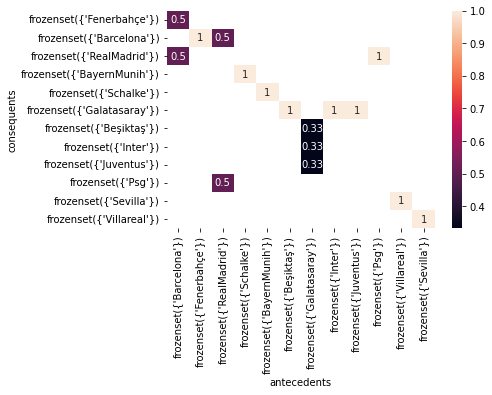

In [8]:
import seaborn as sns

support_table = df_ar.pivot(index='consequents', 
                            columns='antecedents',
                            values='confidence')
sns.heatmap(support_table, annot=True)

In [9]:
df_ar['antecedents2'] = df_ar['antecedents'].apply(lambda antecedent: list(antecedent)[0])
df_ar['consequents2'] = df_ar['consequents'].apply(lambda consequent: list(consequent)[0])
df_ar['rule'] = df_ar.index
df_ar.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents2,consequents2,rule
0,(Barcelona),(Fenerbahçe),0.250,0.125,0.125,0.5,4.0,0.093750,1.75,Barcelona,Fenerbahçe,0
1,(Fenerbahçe),(Barcelona),0.125,0.250,0.125,1.0,4.0,0.093750,inf,Fenerbahçe,Barcelona,1
2,(Barcelona),(RealMadrid),0.250,0.250,0.125,0.5,2.0,0.062500,1.50,Barcelona,RealMadrid,2
3,(RealMadrid),(Barcelona),0.250,0.250,0.125,0.5,2.0,0.062500,1.50,RealMadrid,Barcelona,3
4,(Schalke),(BayernMunih),0.125,0.125,0.125,1.0,8.0,0.109375,inf,Schalke,BayernMunih,4


In [10]:
df_ar_coords = df_ar[['antecedents2','consequents2','rule']]
df_ar_coords.head()

,antecedents2,consequents2,rule
0,Barcelona,Fenerbahçe,0
1,Fenerbahçe,Barcelona,1
2,Barcelona,RealMadrid,2
3,RealMadrid,Barcelona,3
4,Schalke,BayernMunih,4


<AxesSubplot:>

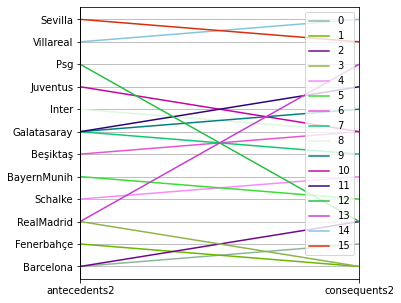

In [11]:
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates

fig, ax = plt.subplots(figsize=(5,5))

parallel_coordinates(df_ar_coords,'rule', ax=ax)

#ax.legend_.remove()

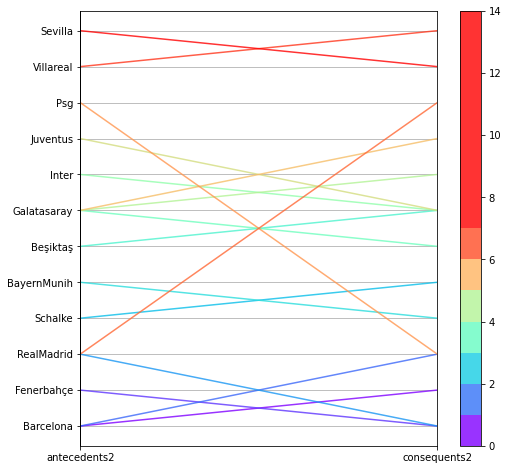

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from pandas.plotting import parallel_coordinates

fig, ax = plt.subplots(figsize=(8, 8))
cmap = plt.get_cmap('rainbow')

parallel_coordinates(df_ar_coords,'rule', colormap=cmap, alpha=0.8, ax=ax)

ax.legend_.remove()

bounds = np.arange(df_ar_coords['rule'].min(), df_ar_coords['rule'].max())
norm = mpl.colors.BoundaryNorm(bounds, 500)

plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', label='', alpha=0.8)
plt.show()